In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.dates as mdates

# FICHERO DE CREACIÓN DE GRÁFICAS PARA EL TFM 

## Resultados simulación PVWatts

In [199]:
df = pd.read_csv('dataset/pvwatts_monthly.csv')

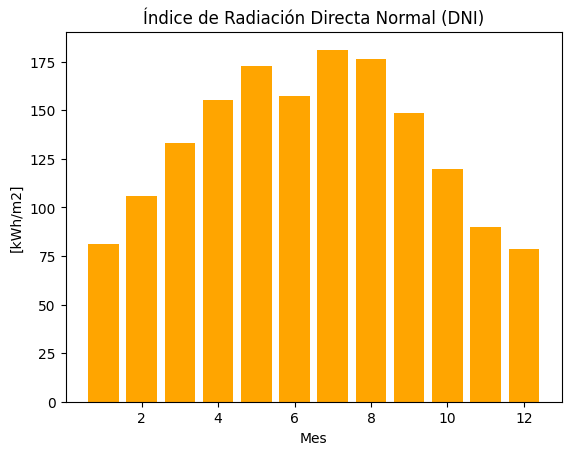

0      81.183932
1     105.719372
2     132.891955
3     155.057305
4     172.782909
5     157.494158
6     181.128296
7     176.187827
8     148.748192
9     119.505953
10     90.163570
11     78.613553
Name: Daily Average POA Irradiance (kWh/m2/day), dtype: float64


In [200]:
#conversión a valores mensuales de DNI (cos26)
df['Daily Average POA Irradiance (kWh/m2/day)'] = df['Daily Average POA Irradiance (kWh/m2/day)']*30/0.8987
 
plt.bar(df['Month'], df['Daily Average POA Irradiance (kWh/m2/day)'], color='orange')

plt.xlabel('Mes')
plt.ylabel('[kWh/m2]')
plt.title('Índice de Radiación Directa Normal (DNI)')

plt.show()
print(df['Daily Average POA Irradiance (kWh/m2/day)'])

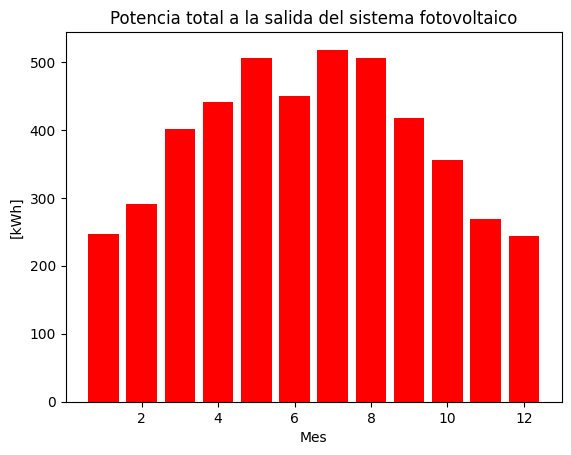

In [201]:
plt.bar(df['Month'], df['DC Array Output (kWh)'], color='red')

plt.xlabel('Mes')
plt.ylabel('[kWh]')
plt.title('Potencia total a la salida del sistema fotovoltaico')

plt.show()

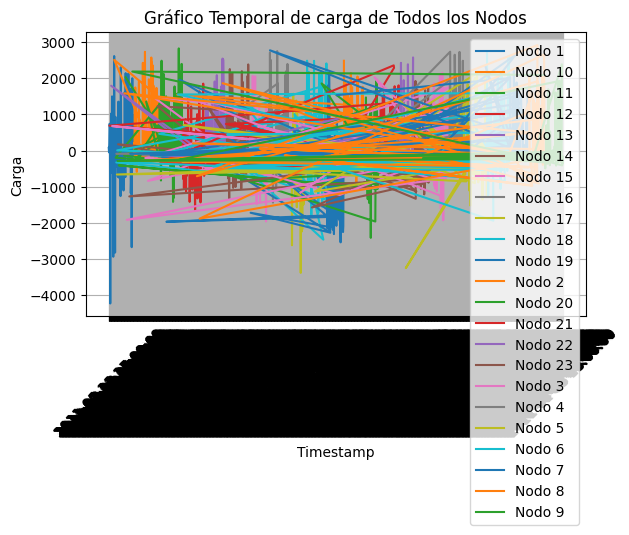

In [202]:
df = pd.read_csv('dataset/nodes/loads/all_loads.csv')
df_sampled = df.sample(frac=0.01, replace=False)

df['timestamp'] = pd.to_datetime(df['timestamp'])

for nodo in df['iid'].unique():
    datos_nodo = df_sampled[df_sampled['iid'] == nodo]
    plt.plot(datos_nodo['timestamp'], datos_nodo['dif'], label=f'Nodo {nodo}')


plt.legend()
plt.xlabel('Timestamp')
plt.ylabel('Carga')
plt.title('Gráfico Temporal de carga de Todos los Nodos')
plt.xticks(rotation=45)  
plt.grid(True)

plt.tight_layout() 
plt.show()

## Representación env+prod

In [216]:
df = pd.read_csv('dataset/env+prod.csv')
df['tmstp'] = pd.to_datetime(df['tmstp'])
df['datetime'] = pd.to_datetime(df['datetime'])
df.head()

,tmstp,station_id,station,Temp,Hum,WS,WD,Pre,Cond,Evt,id,total,thermal,hydro,eolic,biomass,solar,datetime,hour
0,2010-07-01 00:00:00,1,LPMA,19.0,68.0,11.10,NNE,1023.0,Partly Cloudy,NaN,17377,98.22,79.66,9.30,4.22,4.83,0.0,2010-07-01,00:00:00
1,2010-07-01 00:00:00,2,LPPS,19.0,78.0,14.80,NNE,1023.0,Partly Cloudy,NaN,17377,98.22,79.66,9.30,4.22,4.83,0.0,2010-07-01,00:00:00
2,2010-07-01 00:30:00,1,LPMA,19.0,68.0,9.30,NNE,1022.0,Partly Cloudy,NaN,17379,89.87,71.30,9.28,5.79,4.35,0.0,2010-07-01,00:30:00
3,2010-07-01 00:30:00,2,LPPS,19.0,78.0,13.00,NNE,1023.0,Partly Cloudy,NaN,17379,89.87,71.30,9.28,5.79,4.35,0.0,2010-07-01,00:30:00
4,2010-07-01 01:00:00,1,LPMA,18.5,70.0,3.64,Variable,1022.0,Scattered Clouds,NaN,17381,84.46,67.37,7.34,5.53,4.39,0.0,2010-07-01,01:00:00


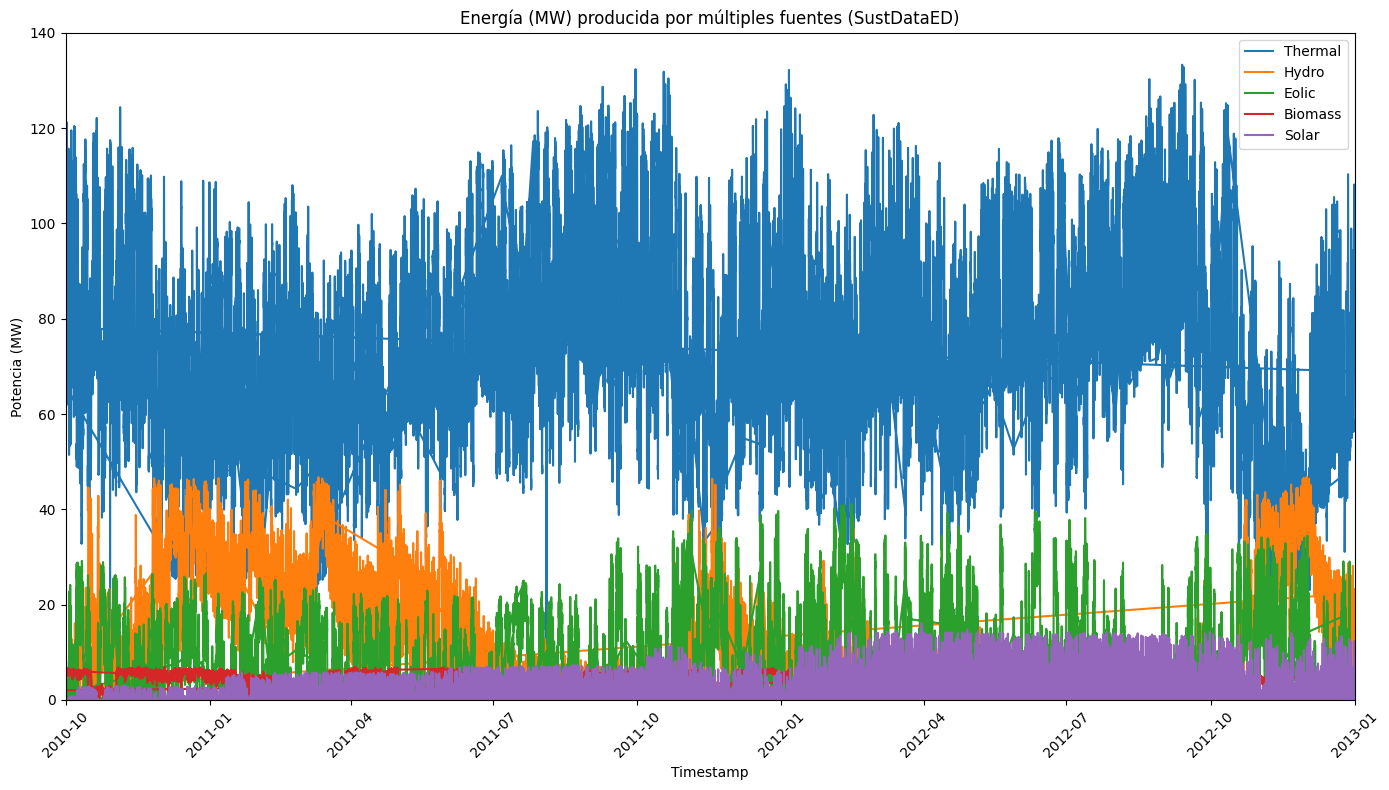

In [204]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(df['tmstp'], df['thermal'], label='Thermal', linestyle='-')
ax.plot(df['tmstp'], df['hydro'], label='Hydro', linestyle='-')
ax.plot(df['tmstp'], df['eolic'], label='Eolic', linestyle='-')
ax.plot(df['tmstp'], df['biomass'], label='Biomass', linestyle='-')
ax.plot(df['tmstp'], df['solar'], label='Solar', linestyle='-')

ax.legend()
ax.set_xlabel('Timestamp')
ax.set_ylabel('Potencia (MW)')
ax.set_title('Energía (MW) producida por múltiples fuentes (SustDataED)')
ax.set_xlim(pd.Timestamp('2010-10-01'),pd.Timestamp('2013-01-01'))
ax.set_ylim(0,140)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

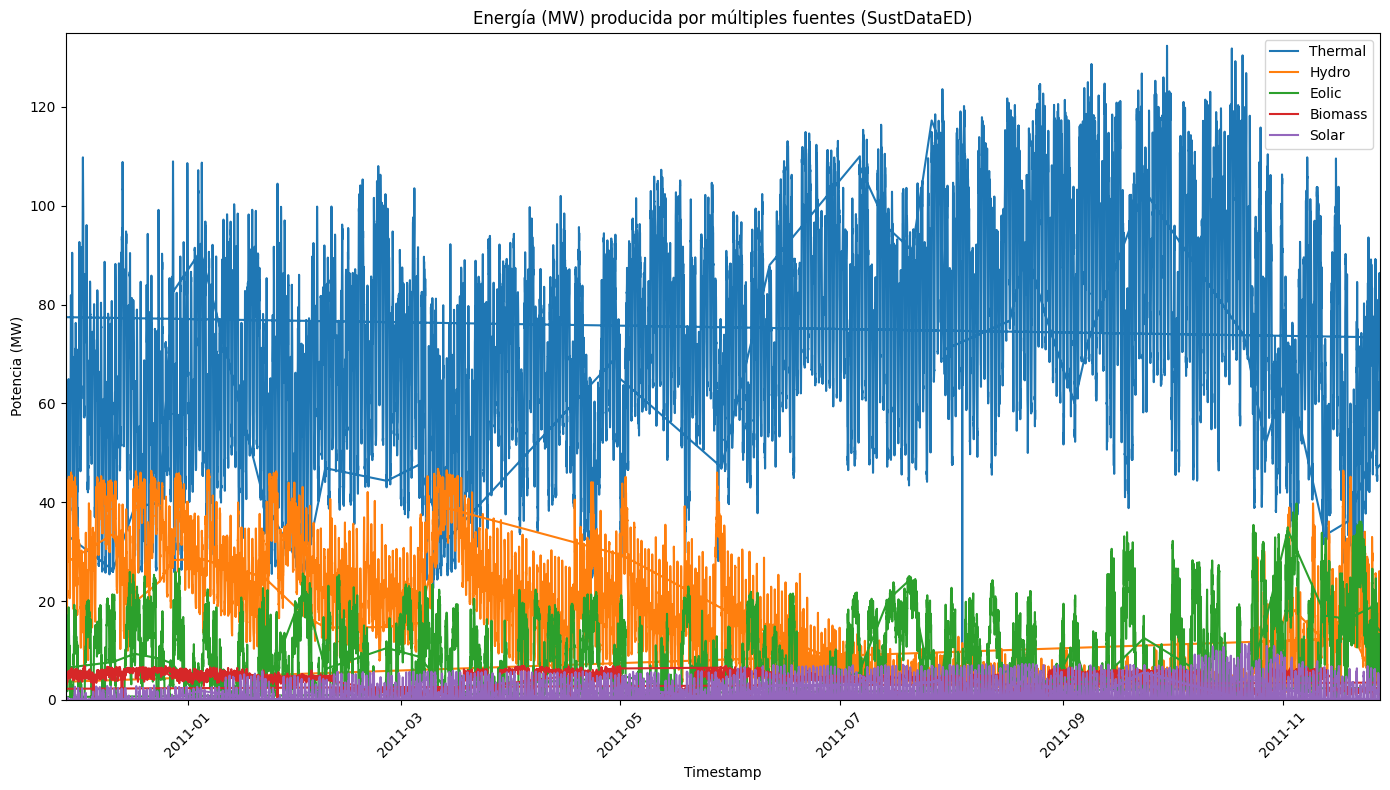

In [205]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(df['tmstp'], df['thermal'], label='Thermal', linestyle='-')
ax.plot(df['tmstp'], df['hydro'], label='Hydro', linestyle='-')
ax.plot(df['tmstp'], df['eolic'], label='Eolic', linestyle='-')
ax.plot(df['tmstp'], df['biomass'], label='Biomass', linestyle='-')
ax.plot(df['tmstp'], df['solar'], label='Solar', linestyle='-')

ax.legend()
ax.set_xlabel('Timestamp')
ax.set_ylabel('Potencia (MW)')
ax.set_title('Energía (MW) producida por múltiples fuentes (SustDataED)')
plt.xlim(pd.Timestamp('2010-11-28'),pd.Timestamp('2011-11-28'))
ax.set_ylim(0,135)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

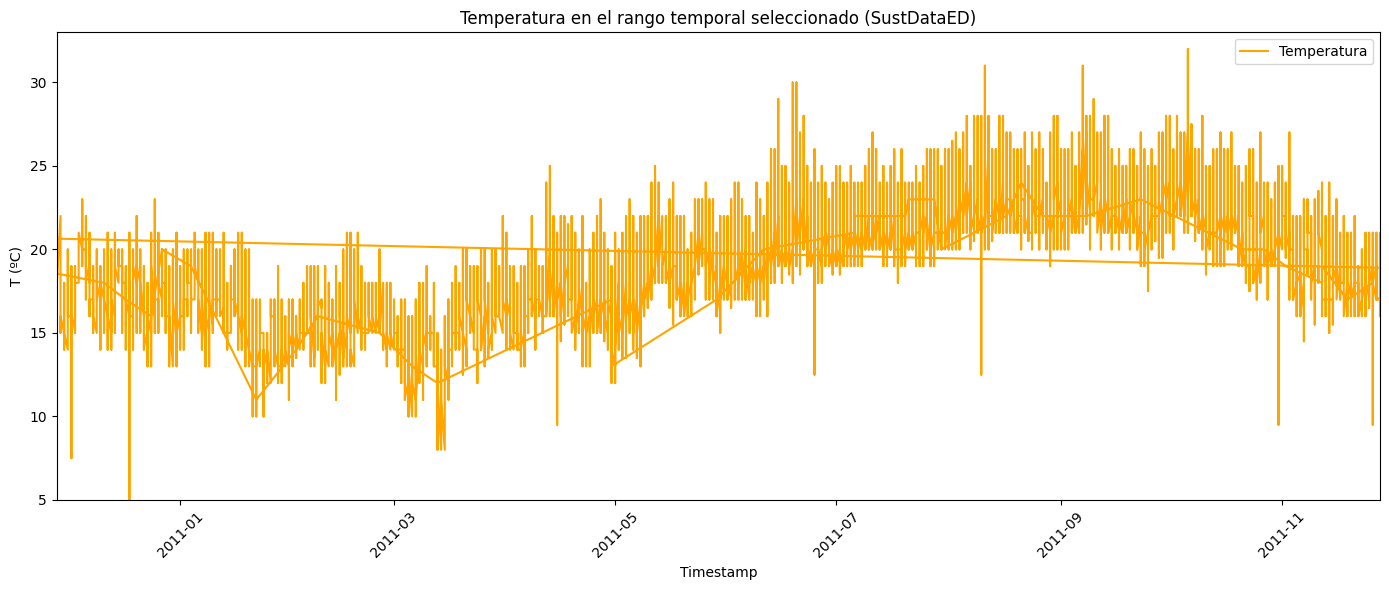

In [217]:
plt.subplots(figsize=(14, 6))

plt.plot(df['datetime'], df['Temp'], label='Temperatura', linestyle='-', color='orange')

plt.legend()
plt.xlabel('Timestamp')
plt.ylabel('T (ºC)')
plt.title('Temperatura en el rango temporal seleccionado (SustDataED)')
plt.xticks(rotation=45)
plt.xlim(pd.Timestamp('2010-11-28'),pd.Timestamp('2011-11-28'))
plt.ylim(5,33)

plt.tight_layout()
plt.show()

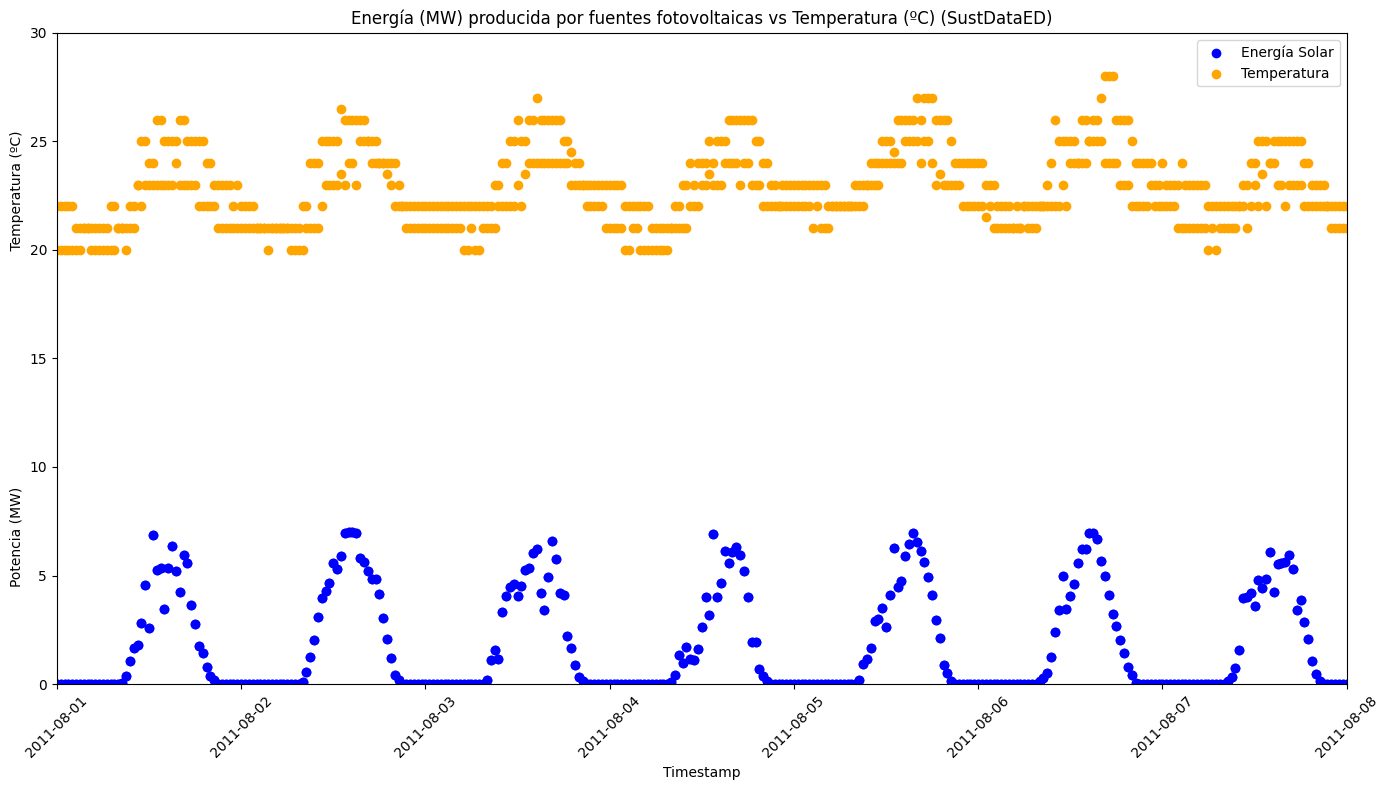

In [207]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.scatter(df['tmstp'], df['solar'], label='Energía Solar', color='blue', marker='o')
ax.scatter(df['tmstp'], df['Temp'], label='Temperatura', color='orange', marker='o')

ax.legend()
ax.set_xlabel('Timestamp')  
ax.set_ylabel('Potencia (MW)                                                      Temperatura (ºC)')
ax.set_title('Energía (MW) producida por fuentes fotovoltaicas vs Temperatura (ºC) (SustDataED)')
ax.tick_params(axis='x', rotation=45)

ax.set_xlim(pd.Timestamp('2011-08-01'), pd.Timestamp('2011-08-08'))
ax.set_ylim(0, 30)

plt.tight_layout()
plt.show()

## Representación mean_prod

In [218]:
df = pd.read_csv('dataset/mean_prod.csv')
df['datetime'] = pd.to_datetime(df['datetime'])

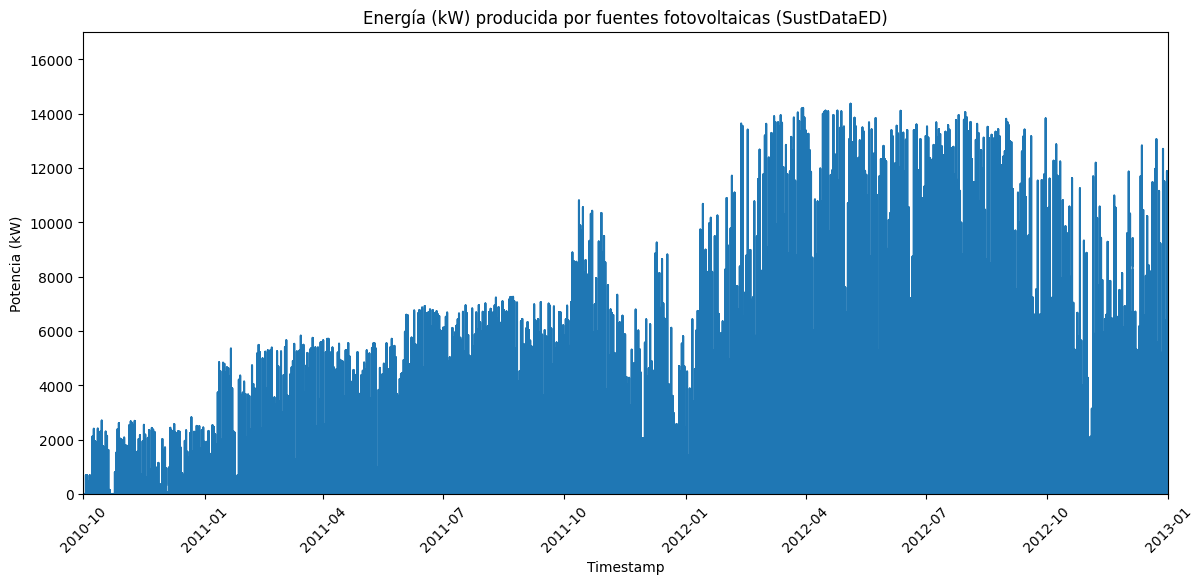

In [209]:
plt.subplots(figsize=(14, 6))

plt.plot(df['datetime'], df['solar']*1000, label='Solar', linestyle='-')

plt.xlabel('Timestamp')
plt.ylabel('Potencia (kW)')
plt.title('Energía (kW) producida por fuentes fotovoltaicas (SustDataED)')
plt.xticks(rotation=45)
plt.xlim(pd.Timestamp('2010-10-01'),pd.Timestamp('2013-01-01'))
plt.ylim(0,17000)
plt.show()

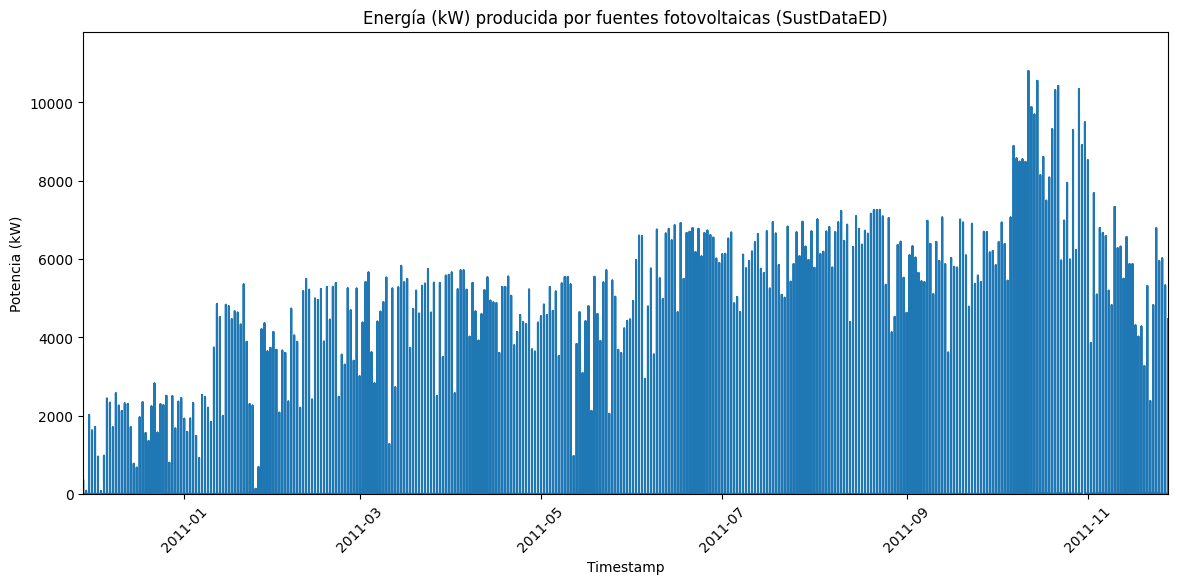

In [220]:
plt.subplots(figsize=(14, 6))

plt.plot(df['datetime'], df['solar']*1000, label='Solar', linestyle='-')

plt.xlabel('Timestamp')
plt.ylabel('Potencia (kW)')
plt.title('Energía (kW) producida por fuentes fotovoltaicas (SustDataED)')
plt.xticks(rotation=45)
plt.xlim(pd.Timestamp('2010-11-28'),pd.Timestamp('2011-11-28'))
plt.ylim(0,11800)
plt.show()

## Representación pvwatts hourly

In [221]:
df = pd.read_csv('dataset/new_pvwatts_hourly.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.head()

,Month,Day,Hour,Beam Irradiance (W/m2),Diffuse Irradiance (W/m2),Ambient Temperature (C),Wind Speed (m/s),Albedo,Plane of Array Irradiance (W/m2),Cell Temperature (C),DC Array Output (W),AC System Output (W),timestamp
0,1,1,0,0,0,14.2,0.0,0.2,0.0,14.2,0.0,0.0,2010-01-01 00:00:00
1,1,1,1,0,0,14.0,0.0,0.2,0.0,14.0,0.0,0.0,2010-01-01 01:00:00
2,1,1,2,0,0,13.7,0.0,0.2,0.0,13.7,0.0,0.0,2010-01-01 02:00:00
3,1,1,3,0,0,13.5,0.0,0.2,0.0,13.5,0.0,0.0,2010-01-01 03:00:00
4,1,1,4,0,0,13.2,0.0,0.2,0.0,13.2,0.0,0.0,2010-01-01 04:00:00


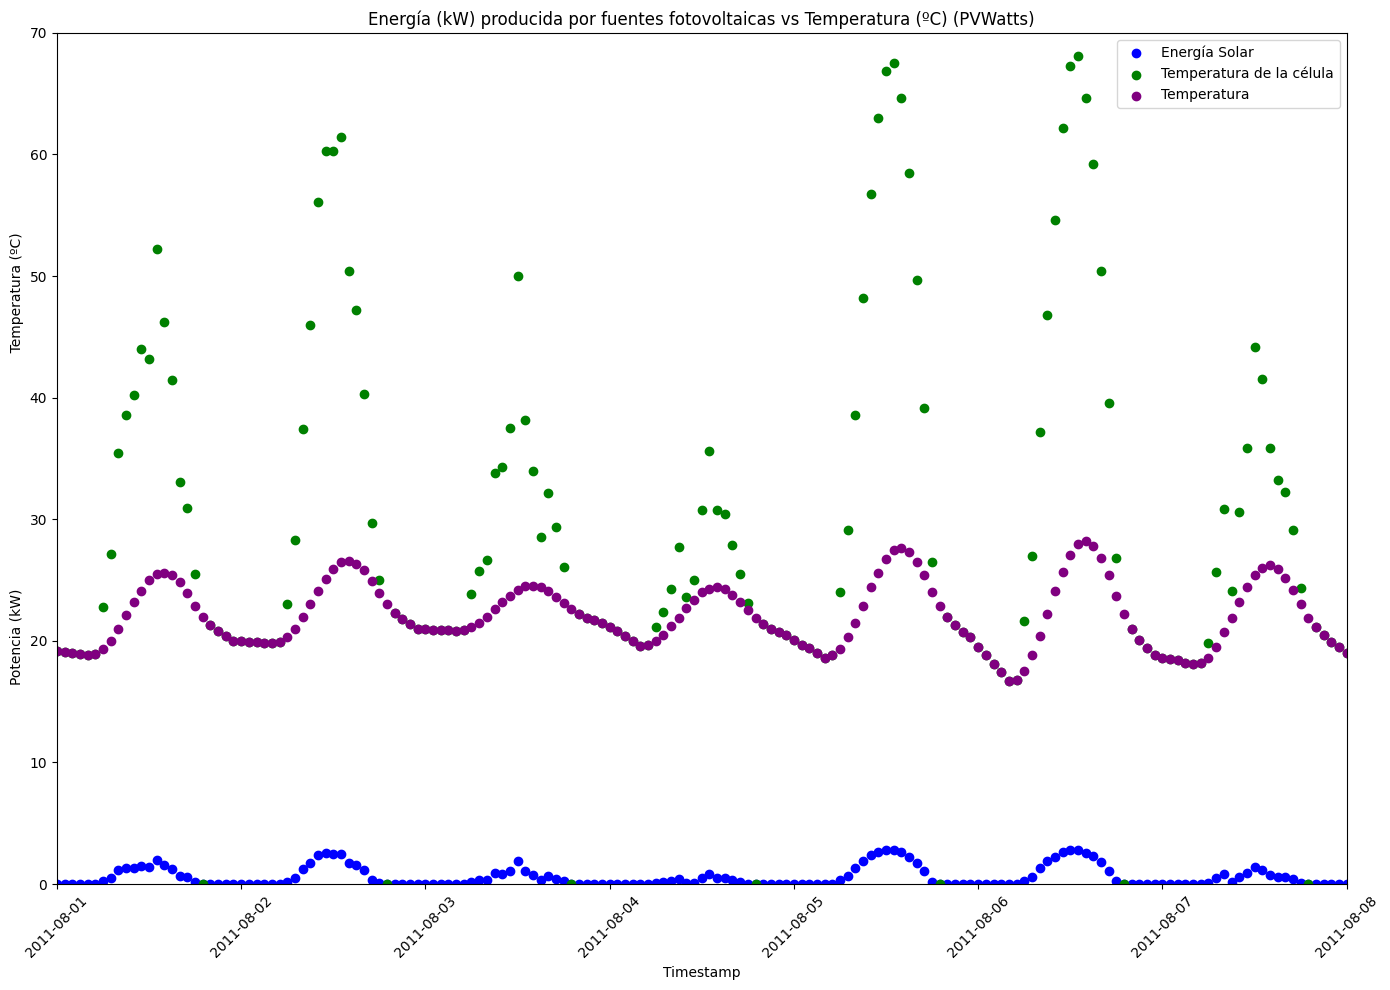

In [212]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.scatter(df['timestamp'], df['DC Array Output (W)']/1000, label='Energía Solar', color='blue', marker='o')
#ax.scatter(df['timestamp'], df['Beam Irradiance (W/m2)']/1000, label='Temperatura', color='green', marker='o')
#ax.scatter(df['timestamp'], df['Diffuse Irradiance (W/m2)']/1000, label='POA', color='red', marker='o')
#ax.scatter(df['timestamp'], df['Plane of Array Irradiance (W/m2)']/1000, label='DIF', color='orange', marker='o')
ax.scatter(df['timestamp'], df['Cell Temperature (C)'], label='Temperatura de la célula', color='green', marker='o')
ax.scatter(df['timestamp'], df['Ambient Temperature (C)'], label='Temperatura', color='purple', marker='o')

ax.legend()
ax.set_xlabel('Timestamp')  
ax.set_ylabel('Potencia (kW)                                                      Temperatura (ºC)')
ax.set_title('Energía (kW) producida por fuentes fotovoltaicas vs Temperatura (ºC) (PVWatts)')
ax.tick_params(axis='x', rotation=45)

ax.set_xlim(pd.Timestamp('2011-08-01'), pd.Timestamp('2011-08-08'))
ax.set_ylim(0,70)

plt.tight_layout()
plt.show()

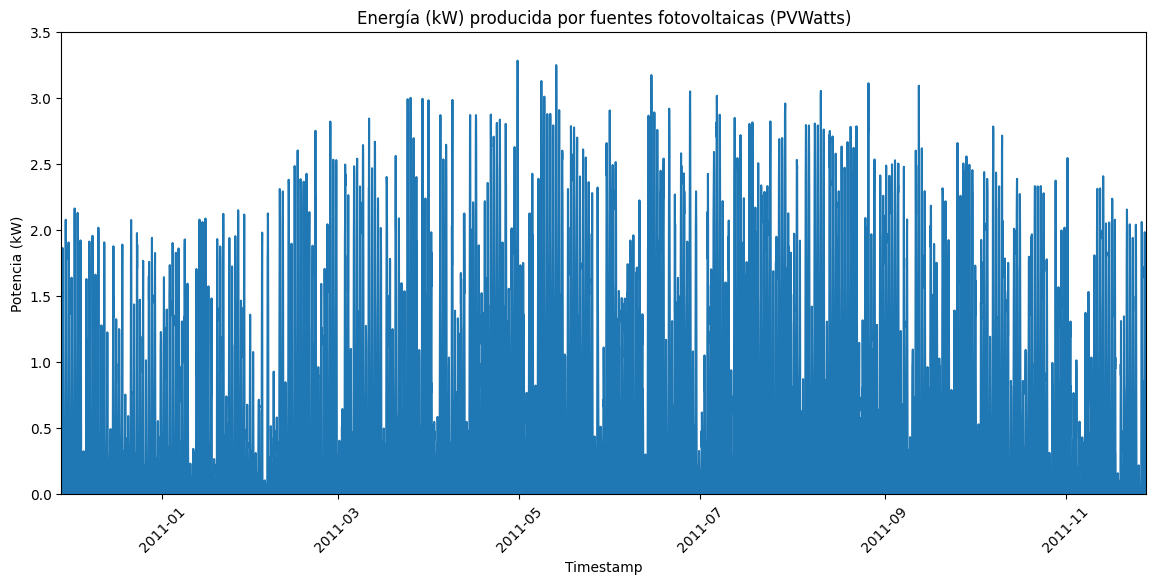

In [222]:
plt.figure(figsize=(14, 6))
plt.plot(df["timestamp"], df["DC Array Output (W)"]/1000, linestyle="-")
plt.title(f"Energía (kW) producida por fuentes fotovoltaicas (PVWatts)")
plt.xlabel("Timestamp")
plt.ylabel("Potencia (kW)")
plt.xlim(pd.Timestamp('2010-11-28'),pd.Timestamp('2011-11-28'))
plt.xticks(rotation=45)
plt.ylim(0,3.5)
plt.show()

## Representacion consum

In [51]:
df = pd.read_csv('dataset/nodes/consum/consum_13.csv')
df2 = pd.read_csv('dataset/nodes/consum/consum_16.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df2['datetime'] = pd.to_datetime(df['datetime'])

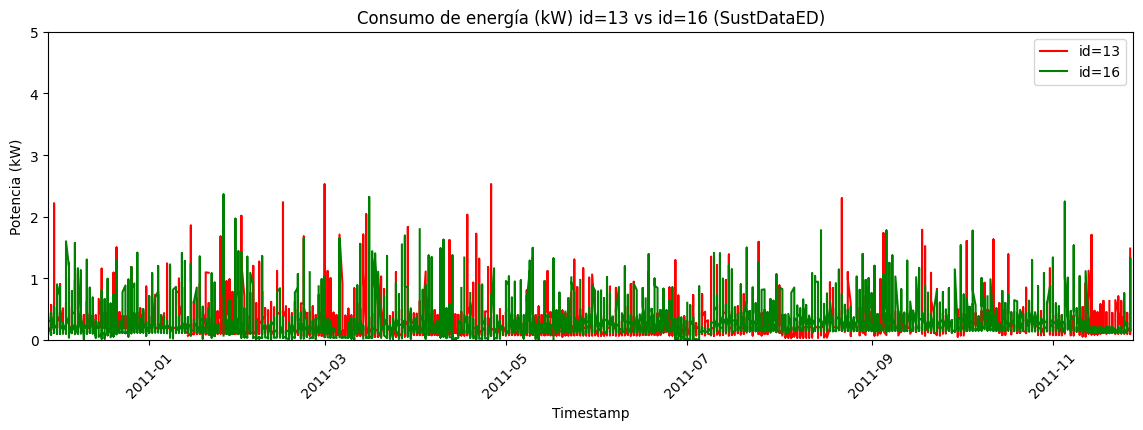

In [53]:
plt.figure(figsize=(14, 4))
plt.plot(df["datetime"], df["Pavg"]/1000, linestyle="-", color='red', label='id=13')
plt.plot(df2["datetime"], df2["Pavg"]/1000, linestyle="-", color='green', label='id=16')
plt.title(f"Consumo de energía (kW) id=13 vs id=16 (SustDataED)")
plt.xlabel("Timestamp")
plt.ylabel("Potencia (kW)")
plt.legend()
plt.xlim(pd.Timestamp('2010-11-28'),pd.Timestamp('2011-11-28'))
plt.xticks(rotation=45)
plt.ylim(0,5)
plt.show()

In [54]:
df = pd.read_csv('dataset/nodes/consum/consum_5.csv')
df2 = pd.read_csv('dataset/nodes/consum/consum_17.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df2['datetime'] = pd.to_datetime(df['datetime'])

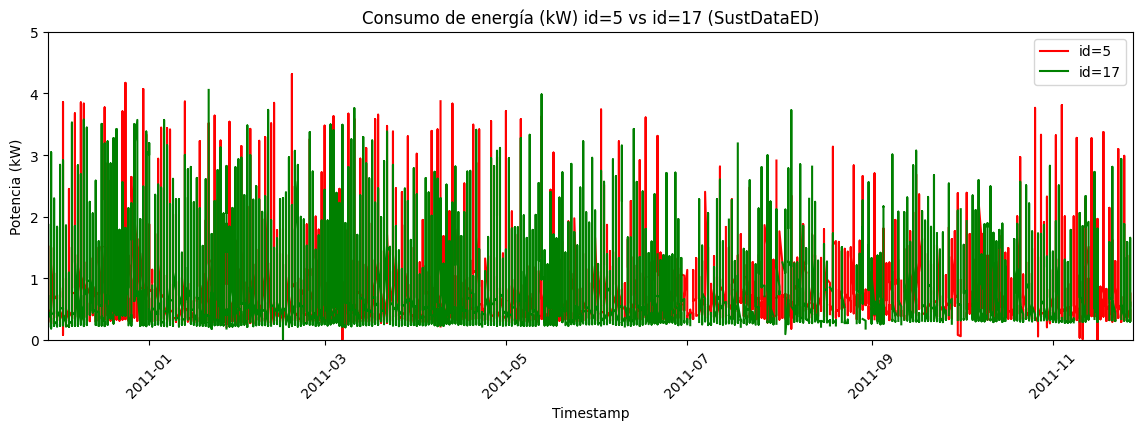

In [55]:
plt.figure(figsize=(14, 4))
plt.plot(df["datetime"], df["Pavg"]/1000, linestyle="-", color='red', label='id=5')
plt.plot(df2["datetime"], df2["Pavg"]/1000, linestyle="-", color='green', label='id=17')
plt.title(f"Consumo de energía (kW) id=5 vs id=17 (SustDataED)")
plt.xlabel("Timestamp")
plt.ylabel("Potencia (kW)")
plt.legend()
plt.xlim(pd.Timestamp('2010-11-28'),pd.Timestamp('2011-11-28'))
plt.xticks(rotation=45)
plt.ylim(0,5)
plt.show()

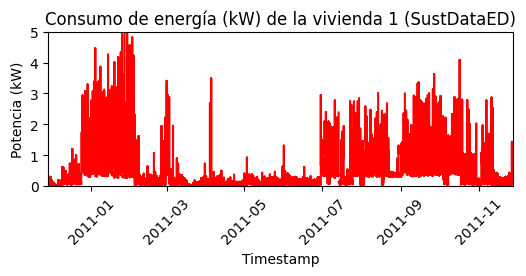

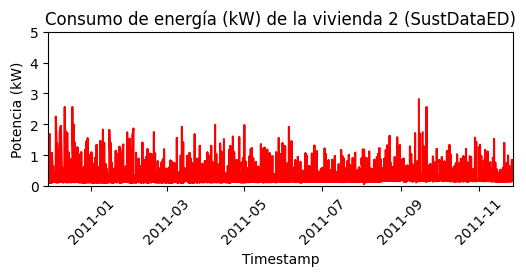

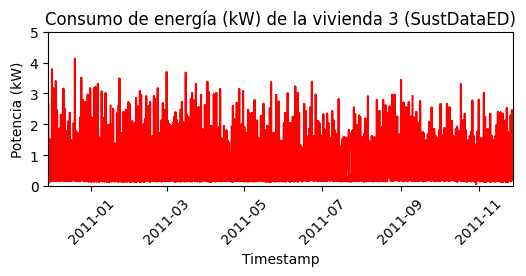

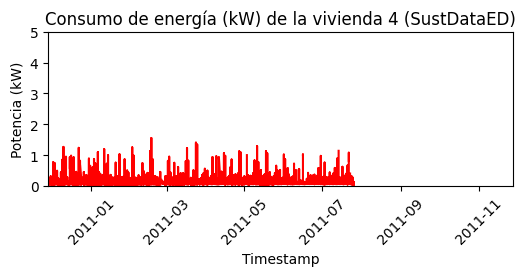

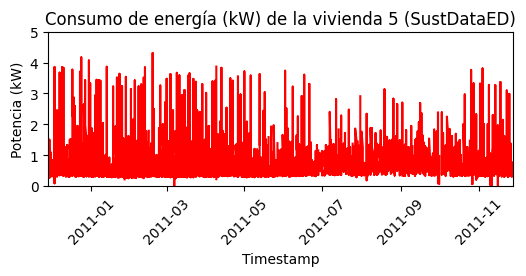

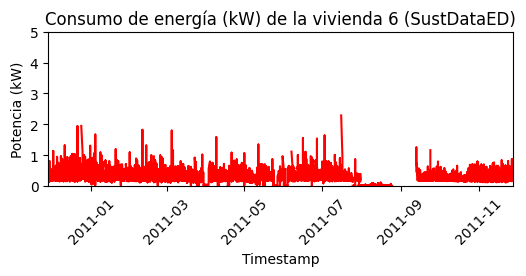

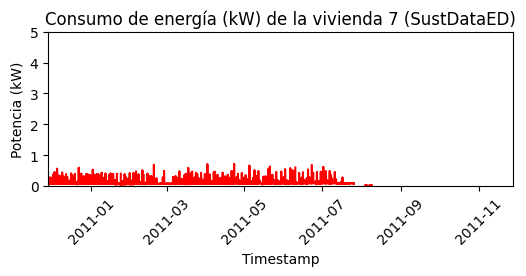

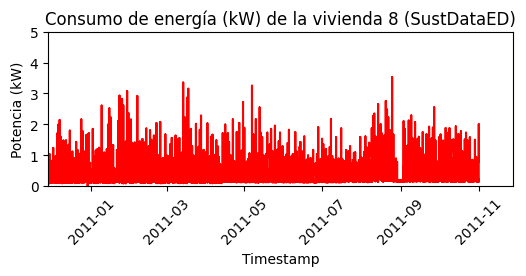

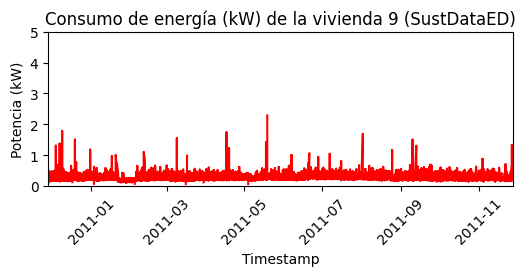

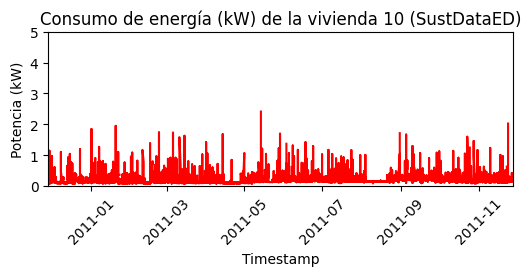

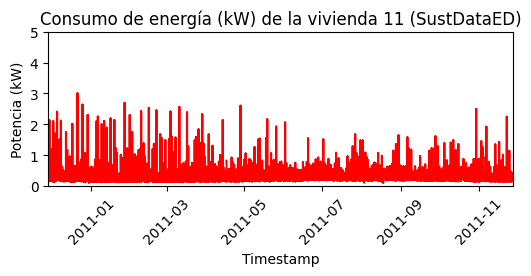

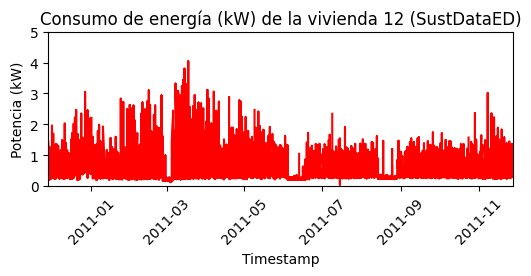

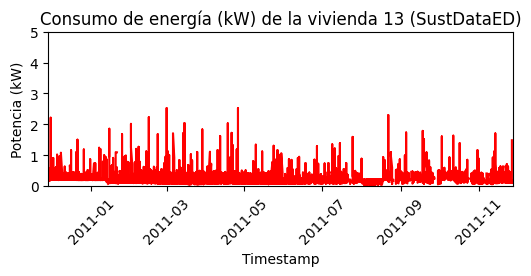

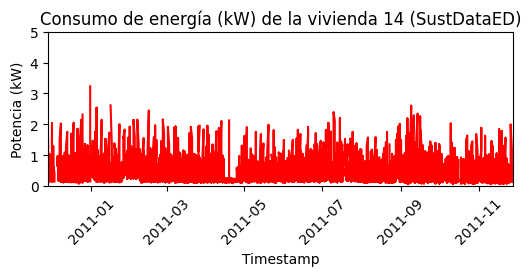

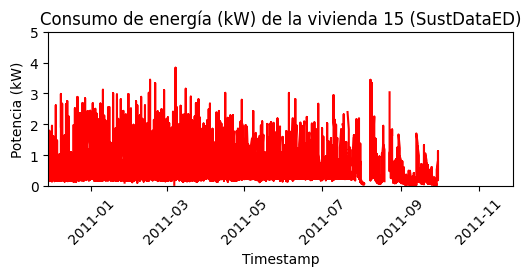

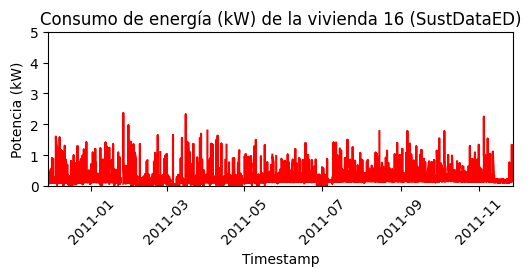

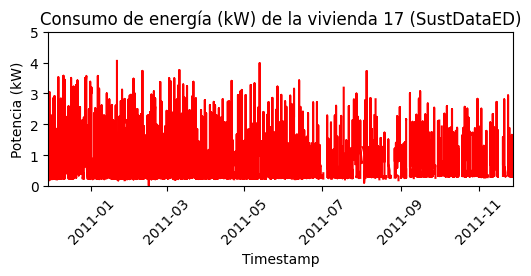

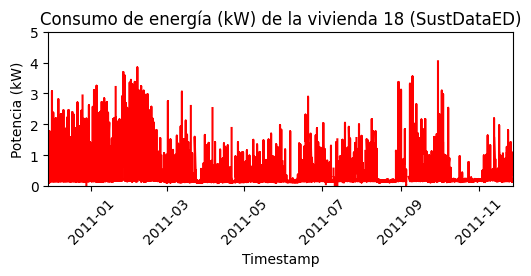

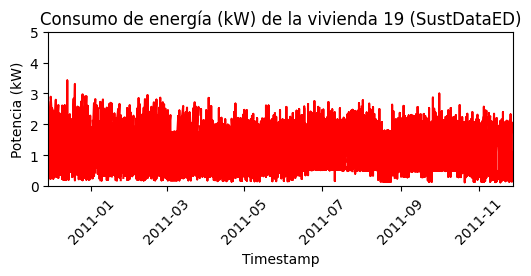

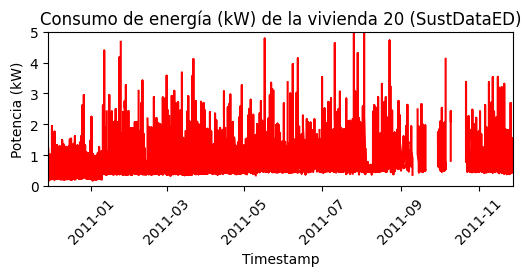

In [28]:
archivos = [f"dataset/nodes/consum/consum_{i}.csv" for i in range(1, 21)]

# Iterar sobre los archivos y trazar los gráficos
for i, archivo in enumerate(archivos, start=1):
    df = pd.read_csv(archivo)  # Leer el DataFrame desde el archivo CSV
    df['datetime'] = pd.to_datetime(df['datetime'])
    plt.figure(figsize=(6, 2))
    plt.plot(df["datetime"], df["Pavg"]/1000, linestyle="-", color='red')
    plt.title(f"Consumo de energía (kW) de la vivienda {i} (SustDataED)")
    plt.xlabel("Timestamp")
    plt.ylabel("Potencia (kW)")
    plt.xlim(pd.Timestamp('2010-11-28'), pd.Timestamp('2011-11-28'))
    plt.xticks(rotation=45)
    plt.ylim(0, 5)
    plt.show()

## Representación load

In [56]:
df = pd.read_csv('dataset/nodes/loads/load_1.csv')
df['datetime'] = pd.to_datetime(df['datetime'])

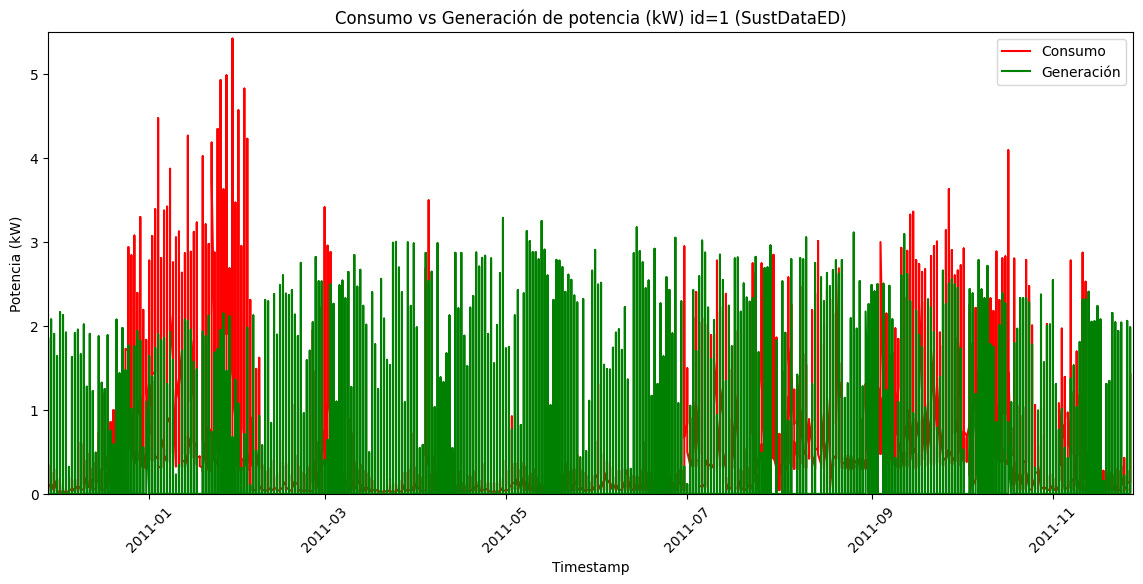

In [75]:
plt.figure(figsize=(14, 6))
plt.plot(df["datetime"], df["Pavg"]/1000, linestyle="-", color='red', label='Consumo')
plt.plot(df["datetime"], df["DC Array Output (W)"]/1000, linestyle="-", color='green', label='Generación')
plt.title(f"Consumo vs Generación de potencia (kW) id=1 (SustDataED)")
plt.xlabel("Timestamp")
plt.ylabel("Potencia (kW)")
plt.legend()
plt.xlim(pd.Timestamp('2010-11-28'),pd.Timestamp('2011-11-28'))
plt.xticks(rotation=45)
plt.ylim(0,5.5)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


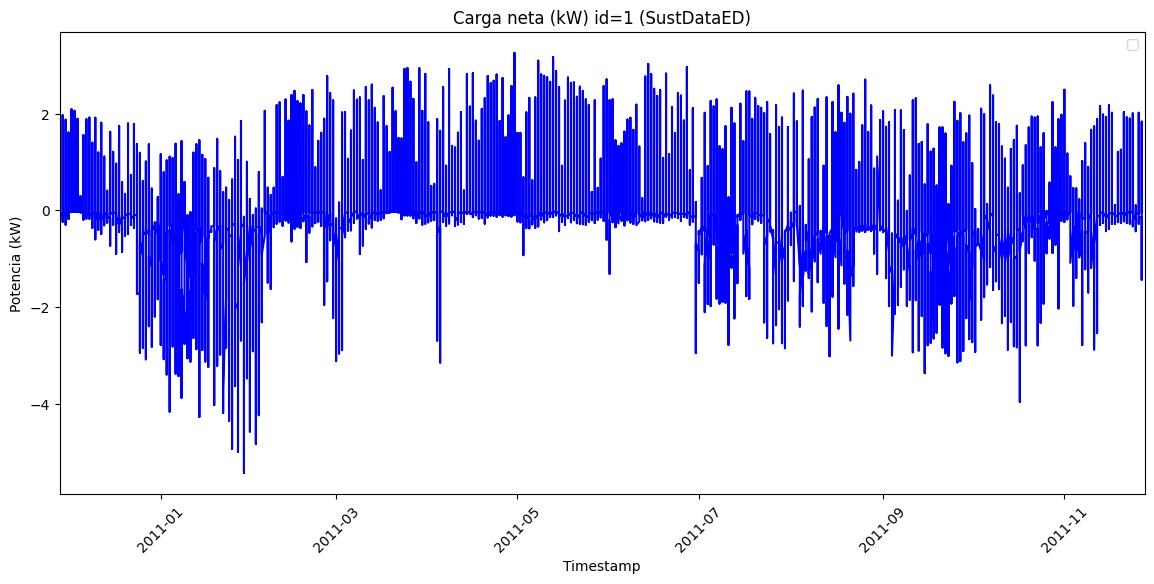

In [73]:
plt.figure(figsize=(14, 6))
plt.plot(df["datetime"], df["dif"]/1000, linestyle="-", color='blue')
plt.title(f"Carga neta (kW) id=1 (SustDataED)")
plt.xlabel("Timestamp")
plt.ylabel("Potencia (kW)")
plt.legend()
plt.xlim(pd.Timestamp('2010-11-28'),pd.Timestamp('2011-11-28'))
plt.xticks(rotation=45)

plt.show()